<a href="https://colab.research.google.com/github/hanene2030/pandas/blob/main/19_advanced_multiindex_pivotiong_more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Advanced topics

In [1]:
import pandas as pd

dfo = pd.read_csv("flights2.csv.gz")
print(dfo.columns)
dfo.head(3)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df = dfo.set_index(["DESTINATION_AIRPORT", "AIRLINE"])
df = df.sort_index() # to make some operation faster
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
ABE                 DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
ABE                 DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
ABE                 DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  

[5 rows x 29 columns]

In [3]:
#Selecting data in a multiindex
df_new =  df.xs(("LAX", "AA" ))
df_new.head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
LAX                 AA       2015      1    1            4           1361   
                    AA       2015      1    1            4           2401   
                    AA       2015      1    1            4              9   
                    AA       2015      1    1            4            201   
                    AA       2015      1    1            4           1529   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
LAX                 AA           N3KYAA            BNA                  610   
                    AA           N858AA            DFW                  655   
                    AA           N792AA            JFK                  700   
                    AA           N3LJAA            BOS                  700   
                    AA           N5DHAA            MCO                  700   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
LAX                 AA                607.0             -3.0  ...   
                    AA                  NaN              NaN  ...   
                    AA                649.0            -11.0  ...   
                    AA                653.0             -7.0  ...   
                    AA                658.0             -2.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
LAX                 AA              847.0           -8.0         0          0   
                    AA                NaN            NaN         0          1   
                    AA             1026.0            6.0         0          0   
                    AA             1045.0           10.0         0          0   
                    AA              926.0           -9.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
LAX                 AA                       NaN               NaN   
                    AA                         B               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
LAX                 AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
LAX                 AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  

[5 rows x 29 columns]

In [4]:
df.loc[("LAX", "AA")].sample()

,,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
DESTINATION_AIRPORT,AIRLINE,,,,,,,,,,,,,,,,,,,,,
LAX,AA,2015,1,30,5,1657,N3GHAA,ORD,1130,1125.0,-5.0,...,1356.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

df.FLIGHT_NUMBER["LAX", "AA"]

DESTINATION_AIRPORT  AIRLINE
LAX                  AA         1361
                     AA         2401
                     AA            9
                     AA          201
                     AA         1529
                                ... 
                     AA          298
                     AA         2491
                     AA          246
                     AA           14
                     AA          286
Name: FLIGHT_NUMBER, Length: 2633, dtype: int64

In [6]:
df_int = df.loc["AAA": ]
df_int.head(2)

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
ABE                 DL                       NaN               NaN   
                    DL                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
ABE                 DL                  NaN            NaN   
                    DL                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
ABE                 DL                       NaN            NaN  
                    DL                       NaN            NaN  

[2 rows x 29 columns]

In [7]:
len(dfo.DESTINATION_AIRPORT.unique())

312

In [8]:
 len(df_int.reset_index().DESTINATION_AIRPORT.unique())


312

In [9]:
df_int.loc[("AAA" , "ABE") : ("DL", "DL")]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   
...                           ...    ...  ...          ...            ...   
DIK                 OO       2015      1   29            4           4770   
                    OO       2015      1   29            4           4737   
                    OO       2015      1   30            5           4770   
                    OO       2015      1   30            5           4737   
                    OO       2015      1   31            6           4737   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   
...                                 ...            ...                  ...   
DIK                 OO           N459SW            MSP                  959   
                    OO           N8965E            MSP                 1956   
                    OO           N8903A            MSP                  959   
                    OO           N448SW            MSP                 1936   
                    OO           N8933B            MSP                 1956   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   
...                                     ...              ...  ...   
DIK                 OO                956.0             -3.0  ...   
                    OO               1951.0             -5.0  ...   
                    OO                954.0             -5.0  ...   
                    OO               1933.0             -3.0  ...   
                    OO               1953.0             -3.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   
...                                   ...            ...       ...        ...   
DIK                 OO             1058.0            3.0         0          0   
                    OO             2037.0          -18.0         0          0   
                    OO             1047.0           -8.0         0          0   
                    OO             2039.0            4.0         0          0   
                    OO             2059.0            6.0         0          0   

                             CANCELLATION_REASO

In [10]:
#Every airport destination , we canot put : in a tuple
df_int.loc[(slice(None), "AA"),:].head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABQ                 AA       2015      1    1            4           1662   
                    AA       2015      1    1            4           1024   
                    AA       2015      1    1            4           1203   
                    AA       2015      1    1            4           2388   
                    AA       2015      1    2            5           1662   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABQ                 AA           N4WJAA            DFW                 1045   
                    AA           N505AA            DFW                 1400   
                    AA           N4XPAA            DFW                 1840   
                    AA           N486AA            DFW                 2115   
                    AA           N582AA            DFW                 1045   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABQ                 AA                  NaN              NaN  ...   
                    AA               1408.0              8.0  ...   
                    AA               1853.0             13.0  ...   
                    AA               2126.0             11.0  ...   
                    AA               1044.0             -1.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABQ                 AA                NaN            NaN         0          1   
                    AA             1500.0           10.0         0          0   
                    AA             1953.0           23.0         0          0   
                    AA             2210.0           10.0         0          0   
                    AA             1126.0           -9.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
ABQ                 AA                         B               NaN   
                    AA                       NaN               NaN   
                    AA                       NaN              10.0   
                    AA                       NaN               NaN   
                    AA                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
ABQ                 AA                  NaN            NaN   
                    AA                  NaN            NaN   
                    AA                  0.0            0.0   
                    AA                  NaN            NaN   
                    AA                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
ABQ                 AA                       NaN            NaN  
                    AA                       NaN            NaN  
                    AA                       6.0            7.0  
                    AA                       NaN            NaN  
                    AA                       NaN            NaN  

[5 rows x 29 columns]

In [11]:
df_int.loc[(slice("A" , "B"),slice("D" , "F")),:].head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
ABE                 DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
ABE                 DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
ABE                 DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  

[5 rows x 29 columns]

In [12]:
idx = pd.IndexSlice


In [13]:
df_int.loc[idx[:, "AA"], :]

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABQ                 AA       2015      1    1            4           1662   
                    AA       2015      1    1            4           1024   
                    AA       2015      1    1            4           1203   
                    AA       2015      1    1            4           2388   
                    AA       2015      1    2            5           1662   
...                           ...    ...  ...          ...            ...   
TUS                 AA       2015      1   31            6           1261   
                    AA       2015      1   31            6           2304   
                    AA       2015      1   31            6           1643   
                    AA       2015      1   31            6           1001   
                    AA       2015      1   31            6            301   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABQ                 AA           N4WJAA            DFW                 1045   
                    AA           N505AA            DFW                 1400   
                    AA           N4XPAA            DFW                 1840   
                    AA           N486AA            DFW                 2115   
                    AA           N582AA            DFW                 1045   
...                                 ...            ...                  ...   
TUS                 AA           N475AA            DFW                 1050   
                    AA           N556AA            DFW                 1240   
                    AA           N4XCAA            DFW                 1450   
                    AA           N4UBAA            DFW                 1830   
                    AA           N4YJAA            DFW                 2005   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABQ                 AA                  NaN              NaN  ...   
                    AA               1408.0              8.0  ...   
                    AA               1853.0             13.0  ...   
                    AA               2126.0             11.0  ...   
                    AA               1044.0             -1.0  ...   
...                                     ...              ...  ...   
TUS                 AA               1135.0             45.0  ...   
                    AA               1235.0             -5.0  ...   
                    AA               1445.0             -5.0  ...   
                    AA               1906.0             36.0  ...   
                    AA               2001.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABQ                 AA                NaN            NaN         0          1   
                    AA             1500.0           10.0         0          0   
                    AA             1953.0           23.0         0          0   
                    AA             2210.0           10.0         0          0   
                    AA             1126.0           -9.0         0          0   
...                                   ...            ...       ...        ...   
TUS                 AA             1256.0           39.0         0          0   
                    AA             1348.0          -18.0         0          0   
                    AA             1558.0          -14.0         0          0   
                    AA             2023.0           29.0         0          0   
                    AA             2129.0           -1.0         0          0   

                             CANCELLATION_REASO

In [14]:
df_int.loc[idx["A" : "B","D" : "F"],:].head()

YEAR  MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
DESTINATION_AIRPORT AIRLINE                                                 
ABE                 DL       2015      1    4            7           2036   
                    DL       2015      1    5            1           1411   
                    DL       2015      1    6            2           1411   
                    DL       2015      1    7            3           1411   
                    DL       2015      1    8            4           1411   

                            TAIL_NUMBER ORIGIN_AIRPORT  SCHEDULED_DEPARTURE  \
DESTINATION_AIRPORT AIRLINE                                                   
ABE                 DL           N979AT            ATL                 2101   
                    DL           N989AT            ATL                 2034   
                    DL           N979AT            ATL                 2034   
                    DL           N958AT            ATL                 2034   
                    DL           N994AT            ATL                 2034   

                             DEPARTURE_TIME  DEPARTURE_DELAY  ...  \
DESTINATION_AIRPORT AIRLINE                                   ...   
ABE                 DL               2101.0              0.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2032.0             -2.0  ...   
                    DL               2031.0             -3.0  ...   
                    DL               2030.0             -4.0  ...   

                             ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
DESTINATION_AIRPORT AIRLINE                                                     
ABE                 DL             2252.0            1.0         0          0   
                    DL             2227.0            2.0         0          0   
                    DL             2221.0           -4.0         0          0   
                    DL             2226.0            1.0         0          0   
                    DL             2223.0           -2.0         0          0   

                             CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
DESTINATION_AIRPORT AIRLINE                                          
ABE                 DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   
                    DL                       NaN               NaN   

                             SECURITY_DELAY  AIRLINE_DELAY  \
DESTINATION_AIRPORT AIRLINE                                  
ABE                 DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   
                    DL                  NaN            NaN   

                             LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
DESTINATION_AIRPORT AIRLINE                                      
ABE                 DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  
                    DL                       NaN            NaN  

[5 rows x 29 columns]

In [15]:
df.index

MultiIndex([('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ('ABE', 'DL'),
            ...
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO'),
            ('YUM', 'OO')],
           names=['DESTINATION_AIRPORT', 'AIRLINE'], length=469968)

In [16]:
#numpy
import numpy as np
airlines = dfo.AIRLINE.to_numpy()
dests = dfo.DESTINATION_AIRPORT.to_numpy()
display(airlines, dests)

array(['AS', 'AA', 'US', ..., 'F9', 'F9', 'UA'], dtype=object)

array(['SEA', 'PBI', 'CLT', ..., 'TPA', 'ATL', 'DEN'], dtype=object)

In [17]:
pd.MultiIndex.from_arrays([airlines, dests])
#df = dfo.set_index(["DESTINATION_AIRPORT", "AIRLINE"]) 

MultiIndex([('AS', 'SEA'),
            ('AA', 'PBI'),
            ('US', 'CLT'),
            ('AA', 'MIA'),
            ('AS', 'ANC'),
            ('DL', 'MSP'),
            ('NK', 'MSP'),
            ('US', 'CLT'),
            ('AA', 'DFW'),
            ('DL', 'ATL'),
            ...
            ('UA', 'SFO'),
            ('B6', 'JFK'),
            ('US', 'MSP'),
            ('B6', 'MCO'),
            ('B6', 'PSE'),
            ('B6', 'BQN'),
            ('DL', 'DTW'),
            ('F9', 'TPA'),
            ('F9', 'ATL'),
            ('UA', 'DEN')],
           length=469968)

In [18]:
# from a list of tuples
tups = [tuple(x) for x in dfo[["DESTINATION_AIRPORT", "AIRLINE"]][:10].to_numpy()]
tups

[('SEA', 'AS'),
 ('PBI', 'AA'),
 ('CLT', 'US'),
 ('MIA', 'AA'),
 ('ANC', 'AS'),
 ('MSP', 'DL'),
 ('MSP', 'NK'),
 ('CLT', 'US'),
 ('DFW', 'AA'),
 ('ATL', 'DL')]

In [19]:
pd.MultiIndex.from_tuples(tups)

MultiIndex([('SEA', 'AS'),
            ('PBI', 'AA'),
            ('CLT', 'US'),
            ('MIA', 'AA'),
            ('ANC', 'AS'),
            ('MSP', 'DL'),
            ('MSP', 'NK'),
            ('CLT', 'US'),
            ('DFW', 'AA'),
            ('ATL', 'DL')],
           )

In [20]:
#Cross product

In [21]:
index_s = pd.MultiIndex.from_product([[1, 2, 3],[2000, 2001], ["Sem 1", "Sem 2"]])

In [22]:
# Naming your index
index_s.names = ["Students", "Years", "Semesters"]
index_s

MultiIndex([(1, 2000, 'Sem 1'),
            (1, 2000, 'Sem 2'),
            (1, 2001, 'Sem 1'),
            (1, 2001, 'Sem 2'),
            (2, 2000, 'Sem 1'),
            (2, 2000, 'Sem 2'),
            (2, 2001, 'Sem 1'),
            (2, 2001, 'Sem 2'),
            (3, 2000, 'Sem 1'),
            (3, 2000, 'Sem 2'),
            (3, 2001, 'Sem 1'),
            (3, 2001, 'Sem 2')],
           names=['Students', 'Years', 'Semesters'])

In [23]:
#Multiindex columns

In [24]:
data = [[60 , 35, 55, 30], [50 , 36, 56, 31], [63 , 37, 54, 32], [65 , 38, 57, 33]]
columns = pd.MultiIndex.from_product([["Sam", "Emma"],["weight", "age"]])
rows = pd.to_datetime(["2018-01-01" , "2019-01-01", "2020-01-01", "2021-01-01"])

df2 = pd.DataFrame(data, columns=columns).set_index(rows)
df2

Sam       Emma    
           weight age weight age
2018-01-01     60  35     55  30
2019-01-01     50  36     56  31
2020-01-01     63  37     54  32
2021-01-01     65  38     57  33

In [25]:
df2.index

DatetimeIndex(['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [26]:
df2["Sam"]

,weight,age
2018-01-01,60,35
2019-01-01,50,36
2020-01-01,63,37
2021-01-01,65,38


In [27]:
df2.loc[:,("Sam", "age")]

2018-01-01    35
2019-01-01    36
2020-01-01    37
2021-01-01    38
Name: (Sam, age), dtype: int64

In [28]:
df2["Sam", "age"]

2018-01-01    35
2019-01-01    36
2020-01-01    37
2021-01-01    38
Name: (Sam, age), dtype: int64

In [29]:
idx = pd.IndexSlice


In [30]:
df2.loc[:,(slice(None), "age")]

,Sam,Emma
,age,age
2018-01-01,35,30
2019-01-01,36,31
2020-01-01,37,32
2021-01-01,38,33


In [31]:
df2.loc[:,idx[:, "age"]]

,Sam,Emma
,age,age
2018-01-01,35,30
2019-01-01,36,31
2020-01-01,37,32
2021-01-01,38,33


In [32]:
df2.loc[:,idx[:, "weight"]]

,Sam,Emma
,weight,weight
2018-01-01,60,55
2019-01-01,50,56
2020-01-01,63,54
2021-01-01,65,57


In [33]:
df2.xs("weight", level=1, axis=1)

,Sam,Emma
2018-01-01,60,55
2019-01-01,50,56
2020-01-01,63,54
2021-01-01,65,57


In [34]:
df2.xs("age", level=1, axis=1)

,Sam,Emma
2018-01-01,35,30
2019-01-01,36,31
2020-01-01,37,32
2021-01-01,38,33


In [35]:
df2.columns.names = ["Name" , "Info"]

In [36]:
df2.columns


MultiIndex([( 'Sam', 'weight'),
            ( 'Sam',    'age'),
            ('Emma', 'weight'),
            ('Emma',    'age')],
           names=['Name', 'Info'])

In [37]:
df2.xs("age",level="Info", axis=1)

Name,Sam,Emma
2018-01-01,35,30
2019-01-01,36,31
2020-01-01,37,32
2021-01-01,38,33


In [38]:
df2.iloc[:, df2.columns.get_level_values("Info") == "age"]# To not do

Name,Sam,Emma
Info,age,age
2018-01-01,35,30
2019-01-01,36,31
2020-01-01,37,32
2021-01-01,38,33


#Stacking and unstaking
unstack :change data fromlong format to wide format

In [39]:
import seaborn as sb

In [40]:
dfo = pd.read_csv("train.csv", low_memory=False)
dfo.dropna(inplace=True)#Drop not a number values
dfo.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [41]:
df = dfo.set_index(["Store", "Date"])
df = df.sort_index()
df.head(2)

DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Store Date                                                                
1     2013-01-01          2      0          0     0      0            a   
      2013-01-02          3   5530        668     1      0            0   

                  SchoolHoliday  
Store Date                       
1     2013-01-01              1  
      2013-01-02              1

In [42]:
# the reason that we're using the store data is because 
#stacking and stacking really only works properly. 
#If the data from index  is is unique

In [43]:
df.unstack()


DayOfWeek                                                         \
Date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
Store                                                                     
1            2.0        3.0        4.0        5.0        6.0        7.0   
2            2.0        3.0        4.0        5.0        6.0        7.0   
3            2.0        3.0        4.0        5.0        6.0        7.0   
4            2.0        3.0        4.0        5.0        6.0        7.0   
5            2.0        3.0        4.0        5.0        6.0        7.0   
...          ...        ...        ...        ...        ...        ...   
1111         2.0        3.0        4.0        5.0        6.0        7.0   
1112         2.0        3.0        4.0        5.0        6.0        7.0   
1113         2.0        3.0        4.0        5.0        6.0        7.0   
1114         2.0        3.0        4.0        5.0        6.0        7.0   
1115         2.0        3.0        4.0        5.0        6.0        7.0   

                                                   ... SchoolHoliday  \
Date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ...    2015-07-22   
Store                                              ...                 
1            1.0        2.0        3.0        4.0  ...           0.0   
2            1.0        2.0        3.0        4.0  ...           1.0   
3            1.0        2.0        3.0        4.0  ...           1.0   
4            1.0        2.0        3.0        4.0  ...           1.0   
5            1.0        2.0        3.0        4.0  ...           1.0   
...          ...        ...        ...        ...  ...           ...   
1111         1.0        2.0        3.0        4.0  ...           1.0   
1112         1.0        2.0        3.0        4.0  ...           1.0   
1113         1.0        2.0        3.0        4.0  ...           1.0   
1114         1.0        2.0        3.0        4.0  ...           1.0   
1115         1.0        2.0        3.0        4.0  ...           0.0   

                                                                         \
Date  2015-07-23 2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28   
Store                                                                     
1            0.0        0.0        0.0        0.0        1.0        1.0   
2            1.0        1.0        0.0        0.0        1.0        1.0   
3            1.0        1.0        0.0        0.0        1.0        1.0   
4            1.0        1.0        0.0        0.0        1.0        1.0   
5            1.0        1.0        0.0        0.0        1.0        1.0   
...          ...        ...        ...        ...        ...        ...   
1111         1.0        1.0        0.0        0.0        1.0        1.0   
1112         1.0        1.0        0.0        0.0        1.0        1.0   
1113         1.0        1.0        0.0        0.0        1.0        1.0   
1114         1.0        1.0        0.0        0.0        1.0        1.0   
1115         0.0        0.0        0.0        0.0        1.0        1.0   

                                        
Date  2015-07-29 2015-07-30 2015-07-31  
Store                                   
1            1.0        1.0        1.0  
2            1.0        1.0        1.0  
3            1.0        1.0        1.0  
4            1.0        1.0        1.0  
5            1.0        1.0        1.0  
...          ...        ...        ...  
1111         1.0        1.0        1.0  
1112         1.0        1.0        1.0  
1113         1.0        1.0        1.0  
1114         1.0        1.0        1.0  
1115         1.0        1.0        1.0  

[1115 rows x 6594 columns]

In [44]:
df.Sales.unstack()
#the entries of that matrix being the sale for that particular store and date

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31
Store,,,,,,,,,,,,,,,,,,,,,
1,0.0,5530.0,4327.0,4486.0,4997.0,0.0,7176.0,5580.0,5471.0,4892.0,...,3464.0,3769.0,3706.0,4364.0,0.0,6102.0,5011.0,4782.0,5020.0,5263.0
2,0.0,4422.0,4159.0,4484.0,2342.0,0.0,6775.0,6318.0,6763.0,5618.0,...,5093.0,4108.0,3854.0,2512.0,0.0,6627.0,5671.0,6402.0,5567.0,6064.0
3,0.0,6823.0,5902.0,6069.0,4523.0,0.0,12247.0,9800.0,8001.0,7772.0,...,5414.0,5702.0,5080.0,3878.0,0.0,8107.0,8864.0,7610.0,8977.0,8314.0
4,0.0,9941.0,8247.0,8290.0,10338.0,0.0,12112.0,10031.0,8857.0,9472.0,...,8503.0,7286.0,8322.0,9322.0,0.0,11812.0,10275.0,10514.0,10387.0,13995.0
5,0.0,4253.0,3465.0,4456.0,1590.0,0.0,6978.0,5718.0,5974.0,4999.0,...,3595.0,3713.0,3815.0,2030.0,0.0,7059.0,6083.0,5899.0,4943.0,4822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.0,5097.0,4579.0,4640.0,3325.0,0.0,9444.0,6472.0,5307.0,5887.0,...,4021.0,3587.0,3918.0,2177.0,0.0,7742.0,6793.0,4907.0,5263.0,5723.0
1112,0.0,10797.0,8716.0,9788.0,9513.0,0.0,25165.0,17058.0,14724.0,14366.0,...,6029.0,6730.0,6220.0,6216.0,0.0,14383.0,9583.0,9179.0,9652.0,9626.0
1113,0.0,6218.0,5563.0,5524.0,5194.0,0.0,8984.0,6866.0,6115.0,7508.0,...,4565.0,6410.0,6399.0,4784.0,0.0,7582.0,6468.0,6640.0,7491.0,7289.0


In [45]:
df.Sales.unstack(level="Store")

Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-01-02,5530.0,4422.0,6823.0,9941.0,4253.0,6089.0,8244.0,5419.0,4903.0,4812.0,...,5099.0,3955.0,6220.0,4576.0,4126.0,5097.0,10797.0,6218.0,20642.0,3697.0
2013-01-03,4327.0,4159.0,5902.0,8247.0,3465.0,5398.0,7231.0,4842.0,4602.0,4675.0,...,4330.0,3151.0,4779.0,3654.0,3508.0,4579.0,8716.0,5563.0,18463.0,4297.0
2013-01-04,4486.0,4484.0,6069.0,8290.0,4456.0,6092.0,7758.0,4059.0,4798.0,5114.0,...,3956.0,3990.0,5491.0,3596.0,3933.0,4640.0,9788.0,5524.0,18371.0,4540.0
2013-01-05,4997.0,2342.0,4523.0,10338.0,1590.0,3872.0,5218.0,2337.0,4254.0,4256.0,...,2624.0,5128.0,2113.0,2897.0,3156.0,3325.0,9513.0,5194.0,18856.0,4771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-27,6102.0,6627.0,8107.0,11812.0,7059.0,5723.0,14869.0,8739.0,10649.0,7212.0,...,7042.0,11221.0,10717.0,8082.0,6761.0,7742.0,14383.0,7582.0,26720.0,10712.0
2015-07-28,5011.0,5671.0,8864.0,10275.0,6083.0,4839.0,12342.0,6717.0,8751.0,6140.0,...,6037.0,9533.0,8211.0,6478.0,5282.0,6793.0,9583.0,6468.0,25518.0,8093.0
2015-07-29,4782.0,6402.0,7610.0,10514.0,5899.0,5275.0,12074.0,7029.0,7776.0,5524.0,...,5536.0,8168.0,6302.0,6212.0,4600.0,4907.0,9179.0,6640.0,25840.0,7661.0


In [46]:
#What if we have more levels?
df2 = dfo.set_index(["Store", "Date", "Open"])
df2 = df2.sort_index()
df2.head(3)

DayOfWeek  Sales  Customers  Promo StateHoliday  \
Store Date       Open                                                    
1     2013-01-01 0             2      0          0      0            a   
      2013-01-02 1             3   5530        668      0            0   
      2013-01-03 1             4   4327        578      0            0   

                       SchoolHoliday  
Store Date       Open                 
1     2013-01-01 0                 1  
      2013-01-02 1                 1  
      2013-01-03 1                 1

In [47]:
df2.unstack()

DayOfWeek      Sales          Customers        Promo       \
Open                     0    1     0        1         0      1     0    1   
Store Date                                                                   
1     2013-01-01       2.0  NaN   0.0      NaN       0.0    NaN   0.0  NaN   
      2013-01-02       NaN  3.0   NaN   5530.0       NaN  668.0   NaN  0.0   
      2013-01-03       NaN  4.0   NaN   4327.0       NaN  578.0   NaN  0.0   
      2013-01-04       NaN  5.0   NaN   4486.0       NaN  619.0   NaN  0.0   
      2013-01-05       NaN  6.0   NaN   4997.0       NaN  635.0   NaN  0.0   
...                    ...  ...   ...      ...       ...    ...   ...  ...   
1115  2015-07-27       NaN  1.0   NaN  10712.0       NaN  608.0   NaN  1.0   
      2015-07-28       NaN  2.0   NaN   8093.0       NaN  500.0   NaN  1.0   
      2015-07-29       NaN  3.0   NaN   7661.0       NaN  473.0   NaN  1.0   
      2015-07-30       NaN  4.0   NaN   8405.0       NaN  502.0   NaN  1.0   
      2015-07-31       NaN  5.0   NaN   8680.0       NaN  538.0   NaN  1.0   

                 StateHoliday      SchoolHoliday       
Open                        0    1             0    1  
Store Date                                             
1     2013-01-01            a  NaN           1.0  NaN  
      2013-01-02          NaN    0           NaN  1.0  
      2013-01-03          NaN    0           NaN  1.0  
      2013-01-04          NaN    0           NaN  1.0  
      2013-01-05          NaN    0           NaN  1.0  
...                       ...  ...           ...  ...  
1115  2015-07-27          NaN    0           NaN  1.0  
      2015-07-28          NaN    0           NaN  1.0  
      2015-07-29          NaN    0           NaN  1.0  
      2015-07-30          NaN    0           NaN  1.0  
      2015-07-31          NaN    0           NaN  1.0  

[1017209 rows x 12 columns]

In [48]:
df2.unstack(level="Store")

DayOfWeek                                               ...  \
Store                1    2    3    4    5    6    7    8    9    10    ...   
Date       Open                                                         ...   
2013-01-01 0          2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  ...   
           1          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
2013-01-02 0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
           1          3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  ...   
2013-01-03 0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2015-07-29 1          3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  ...   
2015-07-30 0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
           1          4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  ...   
2015-07-31 0          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
           1          5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...   

                SchoolHoliday                                               
Store                    1106 1107 1108 1109 1110 1111 1112 1113 1114 1115  
Date       Open                                                             
2013-01-01 0              1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
           1              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2013-01-02 0              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           1              1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2013-01-03 0              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2015-07-29 1              1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  
2015-07-30 0              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           1              1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  
2015-07-31 0              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
           1              1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  

[1636 rows x 6690 columns]

In [49]:
df2.unstack(level="Open")

DayOfWeek      Sales          Customers        Promo       \
Open                     0    1     0        1         0      1     0    1   
Store Date                                                                   
1     2013-01-01       2.0  NaN   0.0      NaN       0.0    NaN   0.0  NaN   
      2013-01-02       NaN  3.0   NaN   5530.0       NaN  668.0   NaN  0.0   
      2013-01-03       NaN  4.0   NaN   4327.0       NaN  578.0   NaN  0.0   
      2013-01-04       NaN  5.0   NaN   4486.0       NaN  619.0   NaN  0.0   
      2013-01-05       NaN  6.0   NaN   4997.0       NaN  635.0   NaN  0.0   
...                    ...  ...   ...      ...       ...    ...   ...  ...   
1115  2015-07-27       NaN  1.0   NaN  10712.0       NaN  608.0   NaN  1.0   
      2015-07-28       NaN  2.0   NaN   8093.0       NaN  500.0   NaN  1.0   
      2015-07-29       NaN  3.0   NaN   7661.0       NaN  473.0   NaN  1.0   
      2015-07-30       NaN  4.0   NaN   8405.0       NaN  502.0   NaN  1.0   
      2015-07-31       NaN  5.0   NaN   8680.0       NaN  538.0   NaN  1.0   

                 StateHoliday      SchoolHoliday       
Open                        0    1             0    1  
Store Date                                             
1     2013-01-01            a  NaN           1.0  NaN  
      2013-01-02          NaN    0           NaN  1.0  
      2013-01-03          NaN    0           NaN  1.0  
      2013-01-04          NaN    0           NaN  1.0  
      2013-01-05          NaN    0           NaN  1.0  
...                       ...  ...           ...  ...  
1115  2015-07-27          NaN    0           NaN  1.0  
      2015-07-28          NaN    0           NaN  1.0  
      2015-07-29          NaN    0           NaN  1.0  
      2015-07-30          NaN    0           NaN  1.0  
      2015-07-31          NaN    0           NaN  1.0  

[1017209 rows x 12 columns]

In [50]:
df2.unstack(level=("Store","Open"))

DayOfWeek                                               ...  \
Store           1         2         3         4         5          ...   
Open               0    1    0    1    0    1    0    1    0    1  ...   
Date                                                               ...   
2013-01-01       2.0  NaN  2.0  NaN  2.0  NaN  2.0  NaN  2.0  NaN  ...   
2013-01-02       NaN  3.0  NaN  3.0  NaN  3.0  NaN  3.0  NaN  3.0  ...   
2013-01-03       NaN  4.0  NaN  4.0  NaN  4.0  NaN  4.0  NaN  4.0  ...   
2013-01-04       NaN  5.0  NaN  5.0  NaN  5.0  NaN  5.0  NaN  5.0  ...   
2013-01-05       NaN  6.0  NaN  6.0  NaN  6.0  NaN  6.0  NaN  6.0  ...   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2015-07-27       NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  ...   
2015-07-28       NaN  2.0  NaN  2.0  NaN  2.0  NaN  2.0  NaN  2.0  ...   
2015-07-29       NaN  3.0  NaN  3.0  NaN  3.0  NaN  3.0  NaN  3.0  ...   
2015-07-30       NaN  4.0  NaN  4.0  NaN  4.0  NaN  4.0  NaN  4.0  ...   
2015-07-31       NaN  5.0  NaN  5.0  NaN  5.0  NaN  5.0  NaN  5.0  ...   

           SchoolHoliday                                               
Store               1111      1112      1113      1114      1115       
Open                   0    1    0    1    0    1    0    1    0    1  
Date                                                                   
2013-01-01           1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  
2013-01-02           NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  
2013-01-03           NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  
2013-01-04           NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  
2013-01-05           NaN  0.0  NaN  0.0  NaN  0.0  NaN  0.0  NaN  1.0  
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
2015-07-27           NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  
2015-07-28           NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  
2015-07-29           NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  
2015-07-30           NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  
2015-07-31           NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  NaN  1.0  

[942 rows x 13320 columns]

In [51]:
df2.Customers.unstack(level=("Open"))

Open                0      1
Store Date                  
1     2013-01-01  0.0    NaN
      2013-01-02  NaN  668.0
      2013-01-03  NaN  578.0
      2013-01-04  NaN  619.0
      2013-01-05  NaN  635.0
...               ...    ...
1115  2015-07-27  NaN  608.0
      2015-07-28  NaN  500.0
      2015-07-29  NaN  473.0
      2015-07-30  NaN  502.0
      2015-07-31  NaN  538.0

[1017209 rows x 2 columns]

In [52]:
df2.Customers.unstack()

Open                0      1
Store Date                  
1     2013-01-01  0.0    NaN
      2013-01-02  NaN  668.0
      2013-01-03  NaN  578.0
      2013-01-04  NaN  619.0
      2013-01-05  NaN  635.0
...               ...    ...
1115  2015-07-27  NaN  608.0
      2015-07-28  NaN  500.0
      2015-07-29  NaN  473.0
      2015-07-30  NaN  502.0
      2015-07-31  NaN  538.0

[1017209 rows x 2 columns]

In [53]:
df2.Customers.unstack(["Store", "Open"])# Keep NaN because it has a meaning , , fill_value=0

Store      1           2           3           4            5            ...  \
Open          0      1    0      1    0      1    0       1    0      1  ...   
Date                                                                     ...   
2013-01-01  0.0    NaN  0.0    NaN  0.0    NaN  0.0     NaN  0.0    NaN  ...   
2013-01-02  NaN  668.0  NaN  650.0  NaN  805.0  NaN  1429.0  NaN  577.0  ...   
2013-01-03  NaN  578.0  NaN  555.0  NaN  721.0  NaN  1248.0  NaN  491.0  ...   
2013-01-04  NaN  619.0  NaN  574.0  NaN  690.0  NaN  1232.0  NaN  533.0  ...   
2013-01-05  NaN  635.0  NaN  324.0  NaN  525.0  NaN  1514.0  NaN  202.0  ...   
...         ...    ...  ...    ...  ...    ...  ...     ...  ...    ...  ...   
2015-07-27  NaN  612.0  NaN  638.0  NaN  768.0  NaN  1379.0  NaN  650.0  ...   
2015-07-28  NaN  560.0  NaN  646.0  NaN  818.0  NaN  1191.0  NaN  598.0  ...   
2015-07-29  NaN  523.0  NaN  727.0  NaN  716.0  NaN  1258.0  NaN  658.0  ...   
2015-07-30  NaN  546.0  NaN  601.0  NaN  823.0  NaN  1276.0  NaN  539.0  ...   
2015-07-31  NaN  555.0  NaN  625.0  NaN  821.0  NaN  1498.0  NaN  559.0  ...   

Store      1111        1112        1113        1114         1115         
Open          0      1    0      1    0      1    0       1    0      1  
Date                                                                     
2013-01-01  0.0    NaN  0.0    NaN  0.0    NaN  0.0     NaN  0.0    NaN  
2013-01-02  NaN  505.0  NaN  892.0  NaN  753.0  NaN  3401.0  NaN  305.0  
2013-01-03  NaN  444.0  NaN  809.0  NaN  718.0  NaN  3211.0  NaN  300.0  
2013-01-04  NaN  453.0  NaN  861.0  NaN  646.0  NaN  3036.0  NaN  326.0  
2013-01-05  NaN  291.0  NaN  856.0  NaN  569.0  NaN  3065.0  NaN  339.0  
...         ...    ...  ...    ...  ...    ...  ...     ...  ...    ...  
2015-07-27  NaN  515.0  NaN  946.0  NaN  684.0  NaN  3468.0  NaN  608.0  
2015-07-28  NaN  493.0  NaN  713.0  NaN  584.0  NaN  3456.0  NaN  500.0  
2015-07-29  NaN  403.0  NaN  709.0  NaN  589.0  NaN  3545.0  NaN  473.0  
2015-07-30  NaN  439.0  NaN  728.0  NaN  716.0  NaN  3251.0  NaN  502.0  
2015-07-31  NaN  422.0  NaN  767.0  NaN  720.0  NaN  3745.0  NaN  538.0  

[942 rows x 2220 columns]

In [54]:
tmp = df2.Customers.unstack(["Store", "Open"])
tmp.index

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26',
       '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31'],
      dtype='object', name='Date', length=942)

In [55]:
tmp.columns

MultiIndex([(   1, 0),
            (   1, 1),
            (   2, 0),
            (   2, 1),
            (   3, 0),
            (   3, 1),
            (   4, 0),
            (   4, 1),
            (   5, 0),
            (   5, 1),
            ...
            (1111, 0),
            (1111, 1),
            (1112, 0),
            (1112, 1),
            (1113, 0),
            (1113, 1),
            (1114, 0),
            (1114, 1),
            (1115, 0),
            (1115, 1)],
           names=['Store', 'Open'], length=2220)

In [56]:
tmp.stack()

Store             1      2      3       4      5      6       7      8     \
Date       Open                                                             
2013-01-01 0       0.0    0.0    0.0     0.0    0.0    0.0     0.0    0.0   
           1       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
2013-01-02 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
           1     668.0  650.0  805.0  1429.0  577.0  781.0   955.0  698.0   
2013-01-03 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
...                ...    ...    ...     ...    ...    ...     ...    ...   
2015-07-29 1     523.0  727.0  716.0  1258.0  658.0  542.0  1166.0  698.0   
2015-07-30 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
           1     546.0  601.0  823.0  1276.0  539.0  541.0  1116.0  882.0   
2015-07-31 0       NaN    NaN    NaN     NaN    NaN    NaN     NaN    NaN   
           1     555.0  625.0  821.0  1498.0  559.0  589.0  1414.0  833.0   

Store             9      10    ...   1106   1107   1108   1109   1110   1111  \
Date       Open                ...                                             
2013-01-01 0       0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
           1       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
2013-01-02 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
           1     481.0  521.0  ...  620.0  525.0  701.0  444.0  507.0  505.0   
2013-01-03 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
...                ...    ...  ...    ...    ...    ...    ...    ...    ...   
2015-07-29 1     625.0  518.0  ...  544.0  748.0  550.0  500.0  509.0  403.0   
2015-07-30 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
           1     651.0  556.0  ...  577.0  712.0  614.0  466.0  510.0  439.0   
2015-07-31 0       NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
           1     687.0  681.0  ...  618.0  825.0  645.0  515.0  642.0  422.0   

Store             1112   1113    1114   1115  
Date       Open                               
2013-01-01 0       0.0    0.0     0.0    0.0  
           1       NaN    NaN     NaN    NaN  
2013-01-02 0       NaN    NaN     NaN    NaN  
           1     892.0  753.0  3401.0  305.0  
2013-01-03 0       NaN    NaN     NaN    NaN  
...                ...    ...     ...    ...  
2015-07-29 1     709.0  589.0  3545.0  473.0  
2015-07-30 0       NaN    NaN     NaN    NaN  
           1     728.0  716.0  3251.0  502.0  
2015-07-31 0       NaN    NaN     NaN    NaN  
           1     767.0  720.0  3745.0  538.0  

[1636 rows x 1115 columns]

In [57]:
tmp.stack(level=["Store", "Open"]).to_frame()#beter than the below mthd

0
Date       Store Open        
2013-01-01 1     0        0.0
           2     0        0.0
           3     0        0.0
           4     0        0.0
           5     0        0.0
...                       ...
2015-07-31 1111  1      422.0
           1112  1      767.0
           1113  1      720.0
           1114  1     3745.0
           1115  1      538.0

[1017209 rows x 1 columns]

In [58]:
tmp.stack().stack()

Date        Open  Store
2013-01-01  0     1           0.0
                  2           0.0
                  3           0.0
                  4           0.0
                  5           0.0
                            ...  
2015-07-31  1     1111      422.0
                  1112      767.0
                  1113      720.0
                  1114     3745.0
                  1115      538.0
Length: 1017209, dtype: float64

In [59]:
#The yearly trend over each store

In [60]:
dfo.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [61]:
data = dfo.set_index(["Store", "Date"])[["Sales"]] #One [ ] gives the series, [[]] =DataFrame rather than the series
data = data.sort_index()
data.head()

Sales
Store Date             
1     2013-01-01      0
      2013-01-02   5530
      2013-01-03   4327
      2013-01-04   4486
      2013-01-05   4997

In [62]:
x = data.unstack()
x

Sales                                                         \
Date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
Store                                                                     
1            0.0     5530.0     4327.0     4486.0     4997.0        0.0   
2            0.0     4422.0     4159.0     4484.0     2342.0        0.0   
3            0.0     6823.0     5902.0     6069.0     4523.0        0.0   
4            0.0     9941.0     8247.0     8290.0    10338.0        0.0   
5            0.0     4253.0     3465.0     4456.0     1590.0        0.0   
...          ...        ...        ...        ...        ...        ...   
1111         0.0     5097.0     4579.0     4640.0     3325.0        0.0   
1112         0.0    10797.0     8716.0     9788.0     9513.0        0.0   
1113         0.0     6218.0     5563.0     5524.0     5194.0        0.0   
1114         0.0    20642.0    18463.0    18371.0    18856.0        0.0   
1115         0.0     3697.0     4297.0     4540.0     4771.0        0.0   

                                                   ...                        \
Date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ... 2015-07-22 2015-07-23   
Store                                              ...                         
1         7176.0     5580.0     5471.0     4892.0  ...     3464.0     3769.0   
2         6775.0     6318.0     6763.0     5618.0  ...     5093.0     4108.0   
3        12247.0     9800.0     8001.0     7772.0  ...     5414.0     5702.0   
4        12112.0    10031.0     8857.0     9472.0  ...     8503.0     7286.0   
5         6978.0     5718.0     5974.0     4999.0  ...     3595.0     3713.0   
...          ...        ...        ...        ...  ...        ...        ...   
1111      9444.0     6472.0     5307.0     5887.0  ...     4021.0     3587.0   
1112     25165.0    17058.0    14724.0    14366.0  ...     6029.0     6730.0   
1113      8984.0     6866.0     6115.0     7508.0  ...     4565.0     6410.0   
1114     21237.0    18816.0    17073.0    18075.0  ...    20424.0    20564.0   
1115      6905.0     5243.0     4649.0     5007.0  ...     5342.0     6150.0   

                                                                         \
Date  2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28 2015-07-29   
Store                                                                     
1         3706.0     4364.0        0.0     6102.0     5011.0     4782.0   
2         3854.0     2512.0        0.0     6627.0     5671.0     6402.0   
3         5080.0     3878.0        0.0     8107.0     8864.0     7610.0   
4         8322.0     9322.0        0.0    11812.0    10275.0    10514.0   
5         3815.0     2030.0        0.0     7059.0     6083.0     5899.0   
...          ...        ...        ...        ...        ...        ...   
1111      3918.0     2177.0        0.0     7742.0     6793.0     4907.0   
1112      6220.0     6216.0        0.0    14383.0     9583.0     9179.0   
1113      6399.0     4784.0        0.0     7582.0     6468.0     6640.0   
1114     19627.0    21312.0        0.0    26720.0    25518.0    25840.0   
1115      5816.0     6897.0        0.0    10712.0     8093.0     7661.0   

                             
Date  2015-07-30 2015-07-31  
Store                        
1         5020.0     5263.0  
2         5567.0     6064.0  
3         8977.0     8314.0  
4        10387.0    13995.0  
5         4943.0     4822.0  
...          ...        ...  
1111      5263.0     5723.0  
1112      9652.0     9626.0  
1113      7491.0     7289.0  
1114     24395.0    27508.0  
1115      8405.0     8680.0  

[1115 rows x 942 columns]

In [63]:
means = x.mean(axis=1)
means

Store
1        3945.704883
2        4122.991507
3        5741.253715
4        8021.769639
5        3867.110403
            ...     
1111     4342.968153
1112     8465.280255
1113     5516.180467
1114    17200.196391
1115     5225.296178
Length: 1115, dtype: float64

In [64]:
x_norm = x.div(means, axis=0)
x_norm.head(2)

Sales                                                         \
Date  2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06   
Store                                                                     
1            0.0   1.401524   1.096635   1.136932   1.266440        0.0   
2            0.0   1.072522   1.008734   1.087560   0.568034        0.0   

                                                   ...                        \
Date  2013-01-07 2013-01-08 2013-01-09 2013-01-10  ... 2015-07-22 2015-07-23   
Store                                              ...                         
1       1.818686   1.414196   1.386571   1.239829  ...   0.877917   0.955216   
2       1.643224   1.532382   1.640314   1.362603  ...   1.235268   0.996364   

                                                                         \
Date  2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28 2015-07-29   
Store                                                                     
1       0.939249   1.106013        0.0   1.546492   1.269989   1.211951   
2       0.934758   0.609266        0.0   1.607328   1.375458   1.552756   

                             
Date  2015-07-30 2015-07-31  
Store                        
1       1.272270   1.333855  
2       1.350233   1.470777  

[2 rows x 942 columns]

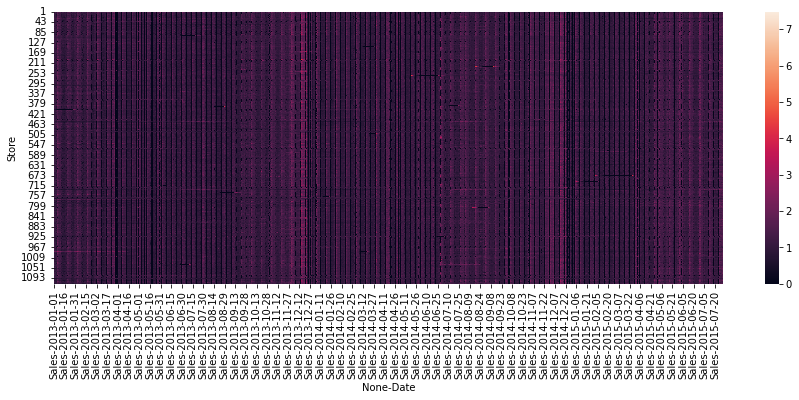

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
sb.heatmap(data=x_norm, ax=ax);


#Pivoting

In [66]:
dfo = pd.read_csv("pres16results.csv")
dfo.sample()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
16957,Scotland County,29199,Donald Trump,MO,1.0,1525.0,1968.0,0.774898,Donald Trump


In [67]:
top = dfo.loc[dfo.fips == "US", ["cand", "votes"]].sort_values("votes", ascending=False)
top.head(3)

,cand,votes
1,Hillary Clinton,60981118.0
0,Donald Trump,60350241.0
2,Gary Johnson,4164589.0


In [68]:
candidates = top.cand.head(5)
candidates

1    Hillary Clinton
0       Donald Trump
2       Gary Johnson
3         Jill Stein
4      Evan McMullin
Name: cand, dtype: object

In [69]:
df = dfo[dfo.cand.isin(candidates)]
df.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [70]:
#Pivot

In [71]:
p = df.pivot(index="fips", columns="cand", values="votes")
p

cand,Donald Trump,Evan McMullin,Gary Johnson,Hillary Clinton,Jill Stein
fips,,,,,
10001,36989.0,NaN,2876.0,33347.0,1041.0
10003,85507.0,NaN,9101.0,162905.0,3955.0
10005,62607.0,NaN,2774.0,39329.0,1104.0
1001,18110.0,NaN,538.0,5908.0,105.0
1003,72780.0,NaN,2448.0,18409.0,453.0
...,...,...,...,...,...
VT,95053.0,NaN,10047.0,178179.0,6748.0
WA,1043648.0,NaN,131779.0,1523720.0,46016.0
WI,1409467.0,NaN,106442.0,1382210.0,30980.0


In [72]:
df.set_index(["fips", "cand"]).votes.unstack()

cand,Donald Trump,Evan McMullin,Gary Johnson,Hillary Clinton,Jill Stein
fips,,,,,
10001,36989.0,NaN,2876.0,33347.0,1041.0
10003,85507.0,NaN,9101.0,162905.0,3955.0
10005,62607.0,NaN,2774.0,39329.0,1104.0
1001,18110.0,NaN,538.0,5908.0,105.0
1003,72780.0,NaN,2448.0,18409.0,453.0
...,...,...,...,...,...
VT,95053.0,NaN,10047.0,178179.0,6748.0
WA,1043648.0,NaN,131779.0,1523720.0,46016.0
WI,1409467.0,NaN,106442.0,1382210.0,30980.0


In [73]:
#Hapiness data
data = [pd.read_csv(f"{year}.csv").assign(Year=year) for year in range(2015,2020)]
for d in data:
  print(d.Year[0], d.columns)

2015 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')
2016 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')
2017 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')
2018 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social supp

In [74]:
renames = {
    "Country or region" : "Country",
     "Happiness.Score" : "Score",
      "Happiness Score" : "Score",
       "Economy (GDP per Capita)" : "GDP per capita",
        "Economy..GDP.per.Capita." : "GDP per capita",
         "Economy..GDP.per.Capita" : "GDP per capita",

}
keep = ["Country", "Score", "Year", "GDP per capita"]

data_prepared = [d.rename(columns=renames).loc[:, keep] for d in data]



In [75]:
df = pd.concat(data_prepared, sort=False ).reset_index(drop=True)
df.sample()

,Country,Score,Year,GDP per capita
449,Niger,4.028,2017,0.161925


In [76]:
#with pd.option_context("display.max_rows", 800, "display.max_columns", 40):
#  display(df)

In [77]:
df.to_csv("happiness.csv", index=False, float_format="%0.3f")

In [78]:
#df.pivot(index="Country", values="Score") => Will fail because we have multiple values across different year for different country

In [79]:
df.pivot_table(index="Country", values="Score")# The scores have been averaged out

,Score
Country,
Afghanistan,3.51280
Albania,4.71260
Algeria,5.66760
Angola,3.87225
Argentina,6.45940
...,...
Venezuela,5.53140
Vietnam,5.15460
Yemen,3.62580


In [80]:
df.groupby("Country").Score.mean().to_frame()

,Score
Country,
Afghanistan,3.51280
Albania,4.71260
Algeria,5.66760
Angola,3.87225
Argentina,6.45940
...,...
Venezuela,5.53140
Vietnam,5.15460
Yemen,3.62580


In [81]:
#Interest of pivot_table
df.pivot_table(index="Country", values="Score", aggfunc=[np.mean, np.std, np.median])

,mean,std,median
,Score,Score,Score
Country,,,
Afghanistan,3.51280,0.232634,3.5750
Albania,4.71260,0.145607,4.6550
Algeria,5.66760,0.465170,5.6050
Angola,3.87225,0.112272,3.8305
Argentina,6.45940,0.231017,6.5740
...,...,...,...
Venezuela,5.53140,0.897944,5.2500
Vietnam,5.15460,0.123009,5.1030


In [82]:
df.pivot_table(index="Country", columns="Year")

GDP per capita                                   Score         \
Year                  2015     2016      2017   2018   2019   2015   2016   
Country                                                                     
Afghanistan        0.31982  0.38227  0.401477  0.332  0.350  3.575  3.360   
Albania            0.87867  0.95530  0.996193  0.916  0.947  4.959  4.655   
Algeria            0.93929  1.05266  1.091864  0.979  1.002  5.605  6.355   
Angola             0.75778  0.84731  0.858428  0.730    NaN  4.033  3.866   
Argentina          1.05351  1.15137  1.185295  1.073  1.092  6.574  6.650   
...                    ...      ...       ...    ...    ...    ...    ...   
Venezuela          1.04424  1.13367  1.128431  0.996  0.960  6.810  6.084   
Vietnam            0.63216  0.74037  0.788548  0.715  0.741  5.360  5.061   
Yemen              0.54649  0.57939  0.591683  0.442  0.287  4.077  3.724   
Zambia             0.47038  0.61202  0.636407  0.562  0.578  5.129  4.795   
Zimbabwe           0.27100  0.35041  0.375847  0.357  0.366  4.610  4.193   

                                  
Year          2017   2018   2019  
Country                           
Afghanistan  3.794  3.632  3.203  
Albania      4.644  4.586  4.719  
Algeria      5.872  5.295  5.211  
Angola       3.795  3.795    NaN  
Argentina    6.599  6.388  6.086  
...            ...    ...    ...  
Venezuela    5.250  4.806  4.707  
Vietnam      5.074  5.103  5.175  
Yemen        3.593  3.355  3.380  
Zambia       4.514  4.377  4.107  
Zimbabwe     3.875  3.692  3.663  

[170 rows x 10 columns]

In [83]:
df.pivot_table(index="Country", columns="Year").swaplevel(0, 1, axis=1).sort_index(axis=1, level=0)

Year                  2015                  2016                  2017         \
            GDP per capita  Score GDP per capita  Score GDP per capita  Score   
Country                                                                         
Afghanistan        0.31982  3.575        0.38227  3.360       0.401477  3.794   
Albania            0.87867  4.959        0.95530  4.655       0.996193  4.644   
Algeria            0.93929  5.605        1.05266  6.355       1.091864  5.872   
Angola             0.75778  4.033        0.84731  3.866       0.858428  3.795   
Argentina          1.05351  6.574        1.15137  6.650       1.185295  6.599   
...                    ...    ...            ...    ...            ...    ...   
Venezuela          1.04424  6.810        1.13367  6.084       1.128431  5.250   
Vietnam            0.63216  5.360        0.74037  5.061       0.788548  5.074   
Yemen              0.54649  4.077        0.57939  3.724       0.591683  3.593   
Zambia             0.47038  5.129        0.61202  4.795       0.636407  4.514   
Zimbabwe           0.27100  4.610        0.35041  4.193       0.375847  3.875   

Year                  2018                  2019         
            GDP per capita  Score GDP per capita  Score  
Country                                                  
Afghanistan          0.332  3.632          0.350  3.203  
Albania              0.916  4.586          0.947  4.719  
Algeria              0.979  5.295          1.002  5.211  
Angola               0.730  3.795            NaN    NaN  
Argentina            1.073  6.388          1.092  6.086  
...                    ...    ...            ...    ...  
Venezuela            0.996  4.806          0.960  4.707  
Vietnam              0.715  5.103          0.741  5.175  
Yemen                0.442  3.355          0.287  3.380  
Zambia               0.562  4.377          0.578  4.107  
Zimbabwe             0.357  3.692          0.366  3.663  

[170 rows x 10 columns]

# Pivoting and margins

In [84]:
df.pivot_table(index="Country", columns="Year", values="Score")

Year,2015,2016,2017,2018,2019
Country,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203
Albania,4.959,4.655,4.644,4.586,4.719
Algeria,5.605,6.355,5.872,5.295,5.211
Angola,4.033,3.866,3.795,3.795,NaN
Argentina,6.574,6.650,6.599,6.388,6.086
...,...,...,...,...,...
Venezuela,6.810,6.084,5.250,4.806,4.707
Vietnam,5.360,5.061,5.074,5.103,5.175
Yemen,4.077,3.724,3.593,3.355,3.380


In [85]:
df.pivot_table(index="Country", columns="Year", values="Score", margins=True)

Year,2015,2016,2017,2018,2019,All
Country,,,,,,
Afghanistan,3.575000,3.360000,3.794000,3.632000,3.203000,3.512800
Albania,4.959000,4.655000,4.644000,4.586000,4.719000,4.712600
Algeria,5.605000,6.355000,5.872000,5.295000,5.211000,5.667600
Angola,4.033000,3.866000,3.795000,3.795000,NaN,3.872250
Argentina,6.574000,6.650000,6.599000,6.388000,6.086000,6.459400
...,...,...,...,...,...,...
Vietnam,5.360000,5.061000,5.074000,5.103000,5.175000,5.154600
Yemen,4.077000,3.724000,3.593000,3.355000,3.380000,3.625800
Zambia,5.129000,4.795000,4.514000,4.377000,4.107000,4.584400


In [86]:
df.pivot_table(index="Country", columns="Year", values="Score", margins=True, aggfunc=np.sum, margins_name="SumOfAll")

Year,2015,2016,2017,2018,2019,SumOfAll
Country,,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203,17.564
Albania,4.959,4.655,4.644,4.586,4.719,23.563
Algeria,5.605,6.355,5.872,5.295,5.211,28.338
Angola,4.033,3.866,3.795,3.795,NaN,15.489
Argentina,6.574,6.650,6.599,6.388,6.086,32.297
...,...,...,...,...,...,...
Vietnam,5.360,5.061,5.074,5.103,5.175,25.773
Yemen,4.077,3.724,3.593,3.355,3.380,18.129
Zambia,5.129,4.795,4.514,4.377,4.107,22.922


In [87]:
res = df.pivot_table(index="Country",values=["Score", "GDP per capita"], margins=True,
               aggfunc=[np.mean, lambda x: np.mean(np.diff(x))])
res

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean                 <lambda>          
            GDP per capita     Score GDP per capita     Score
Country                                                      
Afghanistan       0.357113  3.512800       0.007545 -0.093000
Albania           0.938633  4.712600       0.017083 -0.060000
Algeria           1.012963  5.667600       0.015678 -0.098500
Angola            0.798380  3.872250      -0.009260 -0.079333
Argentina         1.111035  6.459400       0.009623 -0.122000
...                    ...       ...            ...       ...
Vietnam           0.723416  5.154600       0.027210 -0.046250
Yemen             0.489313  3.625800      -0.064873 -0.174250
Zambia            0.571761  4.584400       0.026905 -0.255500
Zimbabwe          0.344051  4.006600       0.023750 -0.236750
All               0.916047  5.379018      -0.001396 -0.006061

[171 rows x 4 columns]

In [88]:
df.pivot_table(index="Country", columns="Year",  values=["Score", "GDP per capita"], margins=True,
               aggfunc=[np.mean,  np.median])

mean                                                   \
            GDP per capita                                                    
Year                  2015     2016      2017      2018      2019       All   
Country                                                                       
Afghanistan       0.319820  0.38227  0.401477  0.332000  0.350000  0.357113   
Albania           0.878670  0.95530  0.996193  0.916000  0.947000  0.938633   
Algeria           0.939290  1.05266  1.091864  0.979000  1.002000  1.012963   
Angola            0.757780  0.84731  0.858428  0.730000       NaN  0.798380   
Argentina         1.053510  1.15137  1.185295  1.073000  1.092000  1.111035   
...                    ...      ...       ...       ...       ...       ...   
Vietnam           0.632160  0.74037  0.788548  0.715000  0.741000  0.723416   
Yemen             0.546490  0.57939  0.591683  0.442000  0.287000  0.489313   
Zambia            0.470380  0.61202  0.636407  0.562000  0.578000  0.571761   
Zimbabwe          0.271000  0.35041  0.375847  0.357000  0.366000  0.344051   
All               0.846137  0.95388  0.984718  0.891449  0.905147  0.916047   

                                                     ...         median  \
                Score                                ... GDP per capita   
Year             2015      2016      2017      2018  ...           2017   
Country                                              ...                  
Afghanistan  3.575000  3.360000  3.794000  3.632000  ...       0.401477   
Albania      4.959000  4.655000  4.644000  4.586000  ...       0.996193   
Algeria      5.605000  6.355000  5.872000  5.295000  ...       1.091864   
Angola       4.033000  3.866000  3.795000  3.795000  ...       0.858428   
Argentina    6.574000  6.650000  6.599000  6.388000  ...       1.185295   
...               ...       ...       ...       ...  ...            ...   
Vietnam      5.360000  5.061000  5.074000  5.103000  ...       0.788548   
Yemen        4.077000  3.724000  3.593000  3.355000  ...       0.591683   
Zambia       5.129000  4.795000  4.514000  4.377000  ...       0.636407   
Zimbabwe     4.610000  4.193000  3.875000  3.692000  ...       0.375847   
All          5.375734  5.382185  5.354019  5.375917  ...       1.064578   

                                                                           \
                                       Score                                
Year           2018   2019       All    2015   2016   2017   2018    2019   
Country                                                                     
Afghanistan  0.3320  0.350  0.350000  3.5750  3.360  3.794  3.632  3.2030   
Albania      0.9160  0.947  0.947000  4.9590  4.655  4.644  4.586  4.7190   
Algeria      0.9790  1.002  1.002000  5.6050  6.355  5.872  5.295  5.2110   
Angola       0.7300    NaN  0.802545  4.0330  3.866  3.795  3.795     NaN   
Argentina    1.0730  1.092  1.092000  6.5740  6.650  6.599  6.388  6.0860   
...             ...    ...       ...     ...    ...    ...    ...     ...   
Vietnam      0.7150  0.741  0.740370  5.3600  5.061  5.074  5.103  5.1750   
Yemen        0.4420  0.287  0.546490  4.0770  3.724  3.593  3.355  3.3800   
Zambia       0.5620  0.578  0.578000  5.1290  4.795  4.514  4.377  4.1070   
Zimbabwe     0.3570  0.366  0.357000  4.6100  4.193  3.875  3.692  3.6630   
All          0.9495  0.960  0.982205  5.2325  5.314  5.279  5.378  5.3795   

                     
                     
Year            All  
Country              
Afghanistan  3.5750  
Albania      4.6550  
Algeria      5.6050  
Angola       3.8305  
Argentina    6.5740  
...             ...  
Vietnam      5.1030  
Yemen        3.5930  
Zambia       4.5140  
Zimbabwe     3.8750  
All          5.3220  

[171 rows x 24 columns]

In [89]:
res.columns = res.columns.set_levels(["mean_score", "avg_improvment"], level=0)
res

mean_score           avg_improvment          
            GDP per capita     Score GDP per capita     Score
Country                                                      
Afghanistan       0.357113  3.512800       0.007545 -0.093000
Albania           0.938633  4.712600       0.017083 -0.060000
Algeria           1.012963  5.667600       0.015678 -0.098500
Angola            0.798380  3.872250      -0.009260 -0.079333
Argentina         1.111035  6.459400       0.009623 -0.122000
...                    ...       ...            ...       ...
Vietnam           0.723416  5.154600       0.027210 -0.046250
Yemen             0.489313  3.625800      -0.064873 -0.174250
Zambia            0.571761  4.584400       0.026905 -0.255500
Zimbabwe          0.344051  4.006600       0.023750 -0.236750
All               0.916047  5.379018      -0.001396 -0.006061

[171 rows x 4 columns]

In [90]:
res= res.dropna()

In [91]:
res = res.sort_values(("mean_score", "Score"))
res


mean_score          avg_improvment          
                         GDP per capita    Score GDP per capita     Score
Country                                                                  
Burundi                        0.062447  3.07900       0.007675  0.217500
Central African Republic       0.032125  3.13425      -0.017500 -0.198333
Syria                          0.699109  3.29220      -0.011050  0.114000
South Sudan                    0.358547  3.38250      -0.029313 -0.326333
Rwanda                         0.322057  3.43860       0.034230 -0.032750
...                                 ...      ...            ...       ...
Iceland                        1.386523  7.51100       0.019420 -0.016750
Switzerland                    1.472164  7.51140       0.013873 -0.026750
Finland                        1.356960  7.53780       0.012438  0.090750
Norway                         1.519381  7.54100       0.007250  0.008000
Denmark                        1.396729  7.54600       0.014380  0.018250

[162 rows x 4 columns]

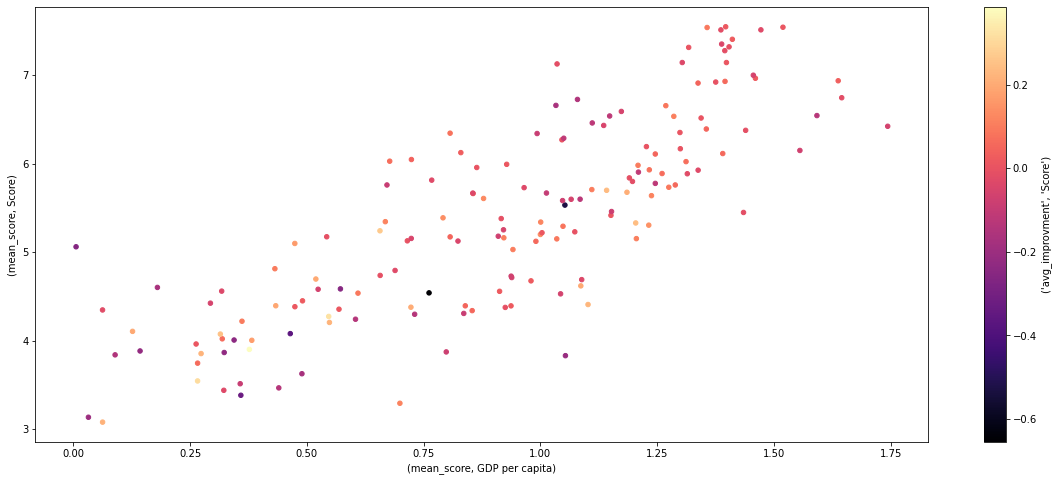

In [92]:
fig , ax = plt.subplots(figsize=(20,8))
res.plot.scatter(("mean_score", "GDP per capita"), ("mean_score", "Score"), c=("avg_improvment", "Score"), cmap="magma" , ax=ax);

In [93]:
xs = res[("mean_score", "GDP per capita")]
ys = res[("mean_score", "Score")]
ls = res.index
ls

Index(['Burundi', 'Central African Republic', 'Syria', 'South Sudan', 'Rwanda',
       'Tanzania', 'Afghanistan', 'Togo', 'Yemen', 'Madagascar',
       ...
       'Australia', 'New Zealand', 'Sweden', 'Canada', 'Netherlands',
       'Iceland', 'Switzerland', 'Finland', 'Norway', 'Denmark'],
      dtype='object', name='Country', length=162)

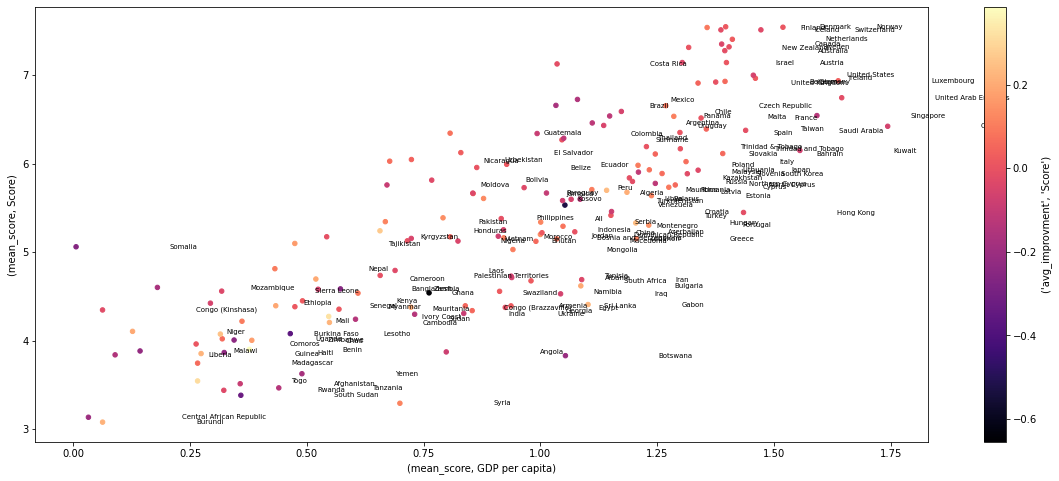

In [94]:
for l, x, y in zip(ls, xs, ys):
  ax.text(x + 0.2, y , l, fontsize=7, va='center')
ax.get_figure()

In [95]:
#Postprocessing data

In [96]:
labels = [f"{i + 1} stars" for i in range(5) ]
labels

['1 stars', '2 stars', '3 stars', '4 stars', '5 stars']

In [97]:
stars = pd.qcut(res[("mean_score", "Score")], 5, labels=labels)
stars.value_counts()

1 stars    33
5 stars    33
2 stars    32
3 stars    32
4 stars    32
Name: (mean_score, Score), dtype: int64

In [98]:
stars

Country
Burundi                     1 stars
Central African Republic    1 stars
Syria                       1 stars
South Sudan                 1 stars
Rwanda                      1 stars
                             ...   
Iceland                     5 stars
Switzerland                 5 stars
Finland                     5 stars
Norway                      5 stars
Denmark                     5 stars
Name: (mean_score, Score), Length: 162, dtype: category
Categories (5, object): ['1 stars' < '2 stars' < '3 stars' < '4 stars' < '5 stars']

In [99]:
res["happiness level"] = stars

In [100]:
res

mean_score          avg_improvment            \
                         GDP per capita    Score GDP per capita     Score   
Country                                                                     
Burundi                        0.062447  3.07900       0.007675  0.217500   
Central African Republic       0.032125  3.13425      -0.017500 -0.198333   
Syria                          0.699109  3.29220      -0.011050  0.114000   
South Sudan                    0.358547  3.38250      -0.029313 -0.326333   
Rwanda                         0.322057  3.43860       0.034230 -0.032750   
...                                 ...      ...            ...       ...   
Iceland                        1.386523  7.51100       0.019420 -0.016750   
Switzerland                    1.472164  7.51140       0.013873 -0.026750   
Finland                        1.356960  7.53780       0.012438  0.090750   
Norway                         1.519381  7.54100       0.007250  0.008000   
Denmark                        1.396729  7.54600       0.014380  0.018250   

                         happiness level  
                                          
Country                                   
Burundi                          1 stars  
Central African Republic         1 stars  
Syria                            1 stars  
South Sudan                      1 stars  
Rwanda                           1 stars  
...                                  ...  
Iceland                          5 stars  
Switzerland                      5 stars  
Finland                          5 stars  
Norway                           5 stars  
Denmark                          5 stars  

[162 rows x 5 columns]

In [101]:
#Drop levels
res.columns = res.columns.droplevel(level=1)
res

,mean_score,mean_score,avg_improvment,avg_improvment,happiness level
Country,,,,,
Burundi,0.062447,3.07900,0.007675,0.217500,1 stars
Central African Republic,0.032125,3.13425,-0.017500,-0.198333,1 stars
Syria,0.699109,3.29220,-0.011050,0.114000,1 stars
South Sudan,0.358547,3.38250,-0.029313,-0.326333,1 stars
Rwanda,0.322057,3.43860,0.034230,-0.032750,1 stars
...,...,...,...,...,...
Iceland,1.386523,7.51100,0.019420,-0.016750,5 stars
Switzerland,1.472164,7.51140,0.013873,-0.026750,5 stars
Finland,1.356960,7.53780,0.012438,0.090750,5 stars


# Crosstab and merging

In [102]:
df = pd.read_csv("heroes_information.csv")
df.drop(columns=df.columns[0] , inplace=True)
df.head(2)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0


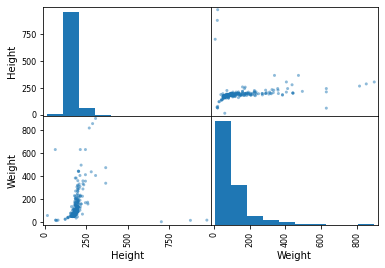

In [104]:
df = df.replace(-99, np.NaN)
pd.plotting.scatter_matrix(df);

In [105]:
# Crosstab
pd.crosstab(index=df["Skin color"], columns=df["Eye color"])

Eye color,-,amber,black,blue,blue / white,bown,brown,gold,green,green / blue,...,purple,red,silver,violet,white,white / red,yellow,yellow (without irises),yellow / blue,yellow / red
Skin color,,,,,,,,,,,,,,,,,,,,,
-,167,2,18,212,1,1,125,2,63,1,...,2,28,1,2,9,1,13,1,1,0
black,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blue,0,0,1,5,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
blue-white,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
gold,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
gray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
green,1,0,1,2,0,0,1,0,7,0,...,1,7,0,0,0,0,1,0,0,0
grey,1,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
orange,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df.pivot_table(index="Skin color", columns="Eye color", values="Publisher", aggfunc="count", dropna=False, fill_value=0)

Eye color,-,amber,black,blue,blue / white,bown,brown,gold,green,green / blue,...,purple,red,silver,violet,white,white / red,yellow,yellow (without irises),yellow / blue,yellow / red
Skin color,,,,,,,,,,,,,,,,,,,,,
-,159,2,18,211,1,1,122,2,63,1,...,2,28,1,2,9,1,12,1,1,0
black,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
blue,0,0,1,5,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
blue-white,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
gold,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
gray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
green,1,0,1,2,0,0,1,0,7,0,...,1,7,0,0,0,0,1,0,0,0
grey,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
orange,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
#Normalisation
pd.crosstab(index=df["Gender"], columns=df["Alignment"], margins=True)

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,1,7,19,2,29
Female,0,35,161,4,200
Male,6,165,316,18,505
All,7,207,496,24,734


In [111]:
100 * pd.crosstab(index=df["Gender"], columns=df["Alignment"], margins=True, normalize="all")

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,0.136240,0.953678,2.588556,0.272480,3.950954
Female,0.000000,4.768392,21.934605,0.544959,27.247956
Male,0.817439,22.479564,43.051771,2.452316,68.801090
All,0.953678,28.201635,67.574932,3.269755,100.000000


In [112]:
100 * pd.crosstab(index=df["Gender"], columns=df["Alignment"], margins=True, normalize="columns")

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,14.285714,3.381643,3.830645,8.333333,3.950954
Female,0.000000,16.908213,32.459677,16.666667,27.247956
Male,85.714286,79.710145,63.709677,75.000000,68.801090


In [113]:
#Melting

In [118]:
res = df.fillna(0).pivot_table(index="Gender", columns="Alignment", values="Height", aggfunc="count", margins=True, fill_value=0)

In [119]:
res

Alignment,-,bad,good,neutral,All
Gender,,,,,
-,1,7,19,2,29
Female,0,35,161,4,200
Male,6,165,316,18,505
All,7,207,496,24,734


In [120]:
res.melt()

,Alignment,value
0,-,1
1,-,0
2,-,6
3,-,7
4,bad,7
5,bad,35
6,bad,165
7,bad,207
8,good,19
9,good,161


In [121]:
res.reset_index()

Alignment,Gender,-,bad,good,neutral,All
0,-,1,7,19,2,29
1,Female,0,35,161,4,200
2,Male,6,165,316,18,505
3,All,7,207,496,24,734


In [122]:
res.reset_index().melt()

,Alignment,value
0,Gender,-
1,Gender,Female
2,Gender,Male
3,Gender,All
4,-,1
5,-,0
6,-,6
7,-,7
8,bad,7
9,bad,35


In [123]:
res.reset_index()

Alignment,Gender,-,bad,good,neutral,All
0,-,1,7,19,2,29
1,Female,0,35,161,4,200
2,Male,6,165,316,18,505
3,All,7,207,496,24,734


In [127]:
work = res.reset_index().melt(id_vars="Gender", value_name="Count")

In [129]:
work.pivot_table(index="Gender", columns="Alignment" , values="Count")

Alignment,-,All,bad,good,neutral
Gender,,,,,
-,1,29,7,19,2
All,7,734,207,496,24
Female,0,200,35,161,4
Male,6,505,165,316,18


In [130]:
work.pivot_table(index="Alignment", columns="Gender" , values="Count")

Gender,-,All,Female,Male
Alignment,,,,
-,1,7,0,6
All,29,734,200,505
bad,7,207,35,165
good,19,496,161,316
neutral,2,24,4,18


In [132]:
work.set_index(["Gender", "Alignment"]).Count.unstack()

Alignment,-,All,bad,good,neutral
Gender,,,,,
-,1,29,7,19,2
All,7,734,207,496,24
Female,0,200,35,161,4
Male,6,505,165,316,18


In [134]:
res.stack().to_frame("Count").reset_index()

,Gender,Alignment,Count
0,-,-,1
1,-,bad,7
2,-,good,19
3,-,neutral,2
4,-,All,29
5,Female,-,0
6,Female,bad,35
7,Female,good,161
8,Female,neutral,4
9,Female,All,200
